In [2]:
import pandas as pd
import numpy as np

In [3]:
# Sample dataset
data = {
    "date": pd.date_range("2025-01-01", periods=12, freq="M"),
    "region": ["North", "South", "East", "West"] * 3,
    "product": ["Whey", "Creatine", "Mass Gainer"] * 4,
    "sales": [5000, 7000, 8000, 6000, 5500, 7500, 9000, 6500, 5800, 7200, 9500, 6200],
    "quantity": [50, 70, 80, 60, 55, 75, 90, 65, 58, 72, 95, 62],
    "employee": ["Juan", "Maria", "Jose", "Ana"] * 3,
}


C:\Users\francis\AppData\Local\Temp\ipykernel_9892\915946413.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "date": pd.date_range("2025-01-01", periods=12, freq="M"),


In [4]:
df = pd.DataFrame(data)

In [5]:
print(df.head())

        date region      product  sales  quantity employee
0 2025-01-31  North         Whey   5000        50     Juan
1 2025-02-28  South     Creatine   7000        70    Maria
2 2025-03-31   East  Mass Gainer   8000        80     Jose
3 2025-04-30   West         Whey   6000        60      Ana
4 2025-05-31  North     Creatine   5500        55     Juan


In [7]:
#All sales > 7000 in South Region
df_filtered = df[(df['sales'] > 7000) & (df['region'] == 'South')]
print(df_filtered)

        date region      product  sales  quantity employee
5 2025-06-30  South  Mass Gainer   7500        75    Maria
9 2025-10-31  South         Whey   7200        72    Maria


In [9]:
df_summary = df.groupby('region').agg(
    avg_sales =('sales','mean'),
    total_sales=('sales','sum'),
    transactions=('sales','count')
)
print(df_summary)

          avg_sales  total_sales  transactions
region                                        
East    8833.333333        26500             3
North   5433.333333        16300             3
South   7233.333333        21700             3
West    6233.333333        18700             3


In [10]:
pivot = pd.pivot_table(df,values='sales',index='region',columns='product',aggfunc='sum')
print(pivot)

product  Creatine  Mass Gainer  Whey
region                              
East         9500         8000  9000
North        5500         5800  5000
South        7000         7500  7200
West         6500         6200  6000


In [11]:
monthly_sales = df.resample("M",on="date")['sales'].sum()
print(monthly_sales)

date
2025-01-31    5000
2025-02-28    7000
2025-03-31    8000
2025-04-30    6000
2025-05-31    5500
2025-06-30    7500
2025-07-31    9000
2025-08-31    6500
2025-09-30    5800
2025-10-31    7200
2025-11-30    9500
2025-12-31    6200
Freq: ME, Name: sales, dtype: int64


C:\Users\francis\AppData\Local\Temp\ipykernel_9892\666721507.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample("M",on="date")['sales'].sum()


In [13]:
#count how many times each employee sold eacch product

ct = pd.crosstab(df['employee'],df['product'])
print(ct)

product   Creatine  Mass Gainer  Whey
employee                             
Ana              1            1     1
Jose             1            1     1
Juan             1            1     1
Maria            1            1     1


In [14]:
df_multi = df.set_index(['region','product'])
print(df_multi.loc[('North','Whey')])

date        2025-01-31 00:00:00
sales                      5000
quantity                     50
employee                   Juan
Name: (North, Whey), dtype: object


In [16]:
df['product'] = df['product'].astype('category')
print(df)

         date region      product  sales  quantity employee
0  2025-01-31  North         Whey   5000        50     Juan
1  2025-02-28  South     Creatine   7000        70    Maria
2  2025-03-31   East  Mass Gainer   8000        80     Jose
3  2025-04-30   West         Whey   6000        60      Ana
4  2025-05-31  North     Creatine   5500        55     Juan
5  2025-06-30  South  Mass Gainer   7500        75    Maria
6  2025-07-31   East         Whey   9000        90     Jose
7  2025-08-31   West     Creatine   6500        65      Ana
8  2025-09-30  North  Mass Gainer   5800        58     Juan
9  2025-10-31  South         Whey   7200        72    Maria
10 2025-11-30   East     Creatine   9500        95     Jose
11 2025-12-31   West  Mass Gainer   6200        62      Ana


In [17]:
import pandas as pd
import numpy as np

data = {
    "employee_id": [101, 102, 103, 104, 105, 106],
    "name": ["Juan", "Maria", "Jose", "Ana", "Pedro", "Liza"],
    "department": ["IT", "HR", "Sales", "IT", "Sales", "HR"],
    "check_in": pd.to_datetime([
        "2025-09-01 08:10", "2025-09-01 08:30", "2025-09-01 09:05",
        "2025-09-01 08:20", "2025-09-01 09:15", "2025-09-01 08:40"
    ]),
    "check_out": pd.to_datetime([
        "2025-09-01 17:05", "2025-09-01 17:20", "2025-09-01 18:10",
        "2025-09-01 17:00", "2025-09-01 18:30", "2025-09-01 17:15"
    ]),
    "salary": [40000, 35000, 30000, 42000, 28000, 36000]
}

df = pd.DataFrame(data)
print(df)

   employee_id   name department            check_in           check_out  \
0          101   Juan         IT 2025-09-01 08:10:00 2025-09-01 17:05:00   
1          102  Maria         HR 2025-09-01 08:30:00 2025-09-01 17:20:00   
2          103   Jose      Sales 2025-09-01 09:05:00 2025-09-01 18:10:00   
3          104    Ana         IT 2025-09-01 08:20:00 2025-09-01 17:00:00   
4          105  Pedro      Sales 2025-09-01 09:15:00 2025-09-01 18:30:00   
5          106   Liza         HR 2025-09-01 08:40:00 2025-09-01 17:15:00   

   salary  
0   40000  
1   35000  
2   30000  
3   42000  
4   28000  
5   36000  


In [18]:
df['work_hours'] = (df['check_out'] - df['check_in']).dt.total_seconds() / 3600

In [19]:
print(df)

   employee_id   name department            check_in           check_out  \
0          101   Juan         IT 2025-09-01 08:10:00 2025-09-01 17:05:00   
1          102  Maria         HR 2025-09-01 08:30:00 2025-09-01 17:20:00   
2          103   Jose      Sales 2025-09-01 09:05:00 2025-09-01 18:10:00   
3          104    Ana         IT 2025-09-01 08:20:00 2025-09-01 17:00:00   
4          105  Pedro      Sales 2025-09-01 09:15:00 2025-09-01 18:30:00   
5          106   Liza         HR 2025-09-01 08:40:00 2025-09-01 17:15:00   

   salary  work_hours  
0   40000    8.916667  
1   35000    8.833333  
2   30000    9.083333  
3   42000    8.666667  
4   28000    9.250000  
5   36000    8.583333  


In [20]:
late_employees = df[df['check_in'].dt.hour >= 9]
print(late_employees)

   employee_id   name department            check_in           check_out  \
2          103   Jose      Sales 2025-09-01 09:05:00 2025-09-01 18:10:00   
4          105  Pedro      Sales 2025-09-01 09:15:00 2025-09-01 18:30:00   

   salary  work_hours  
2   30000    9.083333  
4   28000    9.250000  


In [23]:
df['rank_by_hours'] = df['work_hours'].rank(ascending=False)
print(df)

   employee_id   name department            check_in           check_out  \
0          101   Juan         IT 2025-09-01 08:10:00 2025-09-01 17:05:00   
1          102  Maria         HR 2025-09-01 08:30:00 2025-09-01 17:20:00   
2          103   Jose      Sales 2025-09-01 09:05:00 2025-09-01 18:10:00   
3          104    Ana         IT 2025-09-01 08:20:00 2025-09-01 17:00:00   
4          105  Pedro      Sales 2025-09-01 09:15:00 2025-09-01 18:30:00   
5          106   Liza         HR 2025-09-01 08:40:00 2025-09-01 17:15:00   

   salary  work_hours  rank_by_hours  
0   40000    8.916667            3.0  
1   35000    8.833333            4.0  
2   30000    9.083333            2.0  
3   42000    8.666667            5.0  
4   28000    9.250000            1.0  
5   36000    8.583333            6.0  


In [24]:
df['overtime'] = df['work_hours'] > 9
print(df)

   employee_id   name department            check_in           check_out  \
0          101   Juan         IT 2025-09-01 08:10:00 2025-09-01 17:05:00   
1          102  Maria         HR 2025-09-01 08:30:00 2025-09-01 17:20:00   
2          103   Jose      Sales 2025-09-01 09:05:00 2025-09-01 18:10:00   
3          104    Ana         IT 2025-09-01 08:20:00 2025-09-01 17:00:00   
4          105  Pedro      Sales 2025-09-01 09:15:00 2025-09-01 18:30:00   
5          106   Liza         HR 2025-09-01 08:40:00 2025-09-01 17:15:00   

   salary  work_hours  rank_by_hours  overtime  
0   40000    8.916667            3.0     False  
1   35000    8.833333            4.0     False  
2   30000    9.083333            2.0      True  
3   42000    8.666667            5.0     False  
4   28000    9.250000            1.0      True  
5   36000    8.583333            6.0     False  


In [26]:
df['final_salary'] = np.where(df['overtime'],df['salary'] * 1.05,df['salary'])
print(df)

   employee_id   name department            check_in           check_out  \
0          101   Juan         IT 2025-09-01 08:10:00 2025-09-01 17:05:00   
1          102  Maria         HR 2025-09-01 08:30:00 2025-09-01 17:20:00   
2          103   Jose      Sales 2025-09-01 09:05:00 2025-09-01 18:10:00   
3          104    Ana         IT 2025-09-01 08:20:00 2025-09-01 17:00:00   
4          105  Pedro      Sales 2025-09-01 09:15:00 2025-09-01 18:30:00   
5          106   Liza         HR 2025-09-01 08:40:00 2025-09-01 17:15:00   

   salary  work_hours  rank_by_hours  overtime  final_salary  
0   40000    8.916667            3.0     False       40000.0  
1   35000    8.833333            4.0     False       35000.0  
2   30000    9.083333            2.0      True       31500.0  
3   42000    8.666667            5.0     False       42000.0  
4   28000    9.250000            1.0      True       29400.0  
5   36000    8.583333            6.0     False       36000.0  


In [27]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Average Salary'}, xlabel='department'>

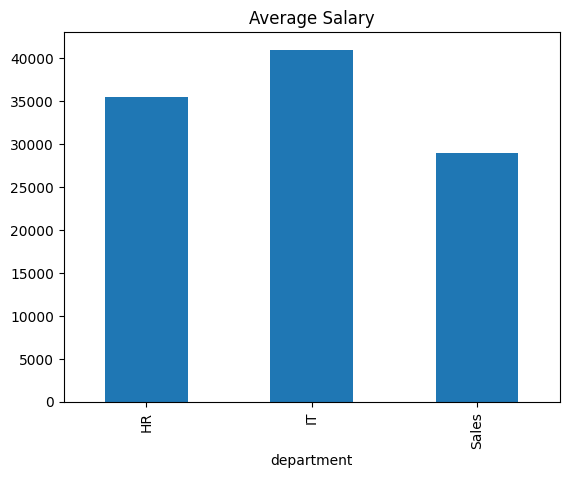

In [28]:
df.groupby('department')['salary'].mean().plot(kind='bar',title='Average Salary')

In [29]:
data = {
    "patient_id": [1, 2, 3, 4, 5],
    "name": ["Juan", "Maria", "Jose", "Ana", "Pedro"],
    "age": [25, 40, 35, 50, 29],
    "gender": ["M", "F", "M", "F", "M"],
    "diagnosis": ["Diabetes", "Hypertension", "Flu", "Diabetes", "Flu"],
    "medicine": ["Metformin", "Amlodipine", "Paracetamol", "Insulin", "Paracetamol"],
    "bill": [3000, 4500, 1200, 5000, 1500]
}
df = pd.DataFrame(data)


In [30]:
df.groupby('diagnosis')['bill'].mean()
print(df)

   patient_id   name  age gender     diagnosis     medicine  bill
0           1   Juan   25      M      Diabetes    Metformin  3000
1           2  Maria   40      F  Hypertension   Amlodipine  4500
2           3   Jose   35      M           Flu  Paracetamol  1200
3           4    Ana   50      F      Diabetes      Insulin  5000
4           5  Pedro   29      M           Flu  Paracetamol  1500


In [ ]:
average_age = df['age'].mean()
count_patient = df['patient_id'].count()

print(f'average age was {average_age} of {count_patient} patient')

average age was 35.8 of 5


In [35]:
data = {
    "patient_id": [1, 2, 3, 4, 5, 6, 7],
    "name": ["Juan", "Maria", "Jose", "Ana", "Pedro", "Liza", "Mark"],
    "age": [25, 40, 35, 50, 29, 60, 33],
    "gender": ["M", "F", "M", "F", "M", "F", "M"],
    "diagnosis": ["Diabetes", "Hypertension", "Flu", "Diabetes", "Flu", "Hypertension", "Diabetes"],
    "medicine": ["Metformin", "Amlodipine", "Paracetamol", "Insulin", "Paracetamol", "Amlodipine", "Insulin"],
    "bill": [3000, 4500, 1200, 5000, 1500, 4700, 5200],
    "visit_date": pd.to_datetime([
        "2025-09-01", "2025-09-01", "2025-09-02",
        "2025-09-02", "2025-09-03", "2025-09-03", "2025-09-04"
    ])
}

df = pd.DataFrame(data)
print(df)

   patient_id   name  age gender     diagnosis     medicine  bill visit_date
0           1   Juan   25      M      Diabetes    Metformin  3000 2025-09-01
1           2  Maria   40      F  Hypertension   Amlodipine  4500 2025-09-01
2           3   Jose   35      M           Flu  Paracetamol  1200 2025-09-02
3           4    Ana   50      F      Diabetes      Insulin  5000 2025-09-02
4           5  Pedro   29      M           Flu  Paracetamol  1500 2025-09-03
5           6   Liza   60      F  Hypertension   Amlodipine  4700 2025-09-03
6           7   Mark   33      M      Diabetes      Insulin  5200 2025-09-04


In [36]:
df[df['diagnosis'] == 'Diabetes']


,patient_id,name,age,gender,diagnosis,medicine,bill,visit_date
0,1,Juan,25,M,Diabetes,Metformin,3000,2025-09-01
3,4,Ana,50,F,Diabetes,Insulin,5000,2025-09-02
6,7,Mark,33,M,Diabetes,Insulin,5200,2025-09-04


In [37]:
df[(df['gender']== 'F') & (df['age'] > 40)]

,patient_id,name,age,gender,diagnosis,medicine,bill,visit_date
3,4,Ana,50,F,Diabetes,Insulin,5000,2025-09-02
5,6,Liza,60,F,Hypertension,Amlodipine,4700,2025-09-03


In [39]:
df['diagnosis'].value_counts()


diagnosis
Diabetes        3
Hypertension    2
Flu             2
Name: count, dtype: int64

In [40]:
df.nlargest(3,'bill')

,patient_id,name,age,gender,diagnosis,medicine,bill,visit_date
6,7,Mark,33,M,Diabetes,Insulin,5200,2025-09-04
3,4,Ana,50,F,Diabetes,Insulin,5000,2025-09-02
5,6,Liza,60,F,Hypertension,Amlodipine,4700,2025-09-03


In [41]:
pd.crosstab(df['diagnosis'],df['medicine'])

medicine,Amlodipine,Insulin,Metformin,Paracetamol
diagnosis,,,,
Diabetes,0,2,1,0
Flu,0,0,0,2
Hypertension,2,0,0,0


In [45]:
df['age_group'] = pd.cut(df['age'],bins=[0,18,40,60,100],
                         labels=['Child','Adult','Senior','Super old age'])

df.groupby('age_group')['bill'].mean()

C:\Users\francis\AppData\Local\Temp\ipykernel_9892\3805688249.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['bill'].mean()


age_group
Child               NaN
Adult            3080.0
Senior           4850.0
Super old age       NaN
Name: bill, dtype: float64

In [46]:
print(df)

   patient_id   name  age gender     diagnosis     medicine  bill visit_date  \
0           1   Juan   25      M      Diabetes    Metformin  3000 2025-09-01   
1           2  Maria   40      F  Hypertension   Amlodipine  4500 2025-09-01   
2           3   Jose   35      M           Flu  Paracetamol  1200 2025-09-02   
3           4    Ana   50      F      Diabetes      Insulin  5000 2025-09-02   
4           5  Pedro   29      M           Flu  Paracetamol  1500 2025-09-03   
5           6   Liza   60      F  Hypertension   Amlodipine  4700 2025-09-03   
6           7   Mark   33      M      Diabetes      Insulin  5200 2025-09-04   

  age_group  
0     Adult  
1     Adult  
2     Adult  
3    Senior  
4     Adult  
5    Senior  
6     Adult  


In [49]:
# MultiIndex
df_multi = df.set_index(['diagnosis', 'gender'])

# Correct way to select
print(df_multi.loc[('Diabetes', 'M')])

                  patient_id  name  age   medicine  bill visit_date age_group
diagnosis gender                                                             
Diabetes  M                1  Juan   25  Metformin  3000 2025-09-01     Adult
          M                7  Mark   33    Insulin  5200 2025-09-04     Adult


C:\Users\francis\AppData\Local\Temp\ipykernel_9892\1934689253.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(df_multi.loc[('Diabetes', 'M')])


In [50]:
pd.crosstab(df['gender'],df['diagnosis'])

diagnosis,Diabetes,Flu,Hypertension
gender,,,
F,1,0,2
M,2,2,0
